In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\IBM\Supervised ML\Linear Regression\Datasets\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning and Wrangling

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
sum(df.car_ID.duplicated()) == 0

True

In [33]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [34]:
df['brand'] = df.CarName.str.split(' ').str.get(0).str.lower()

In [35]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [36]:
df['brand'].replace('maxda','mazda', inplace=True)
df['brand'].replace('porcshce', 'porsche', inplace=True)
df['brand'].replace('toyouta', 'toyota', inplace=True)
df['brand'].replace(['vw','vokswagen'], 'volkswagen', inplace=True)

In [37]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

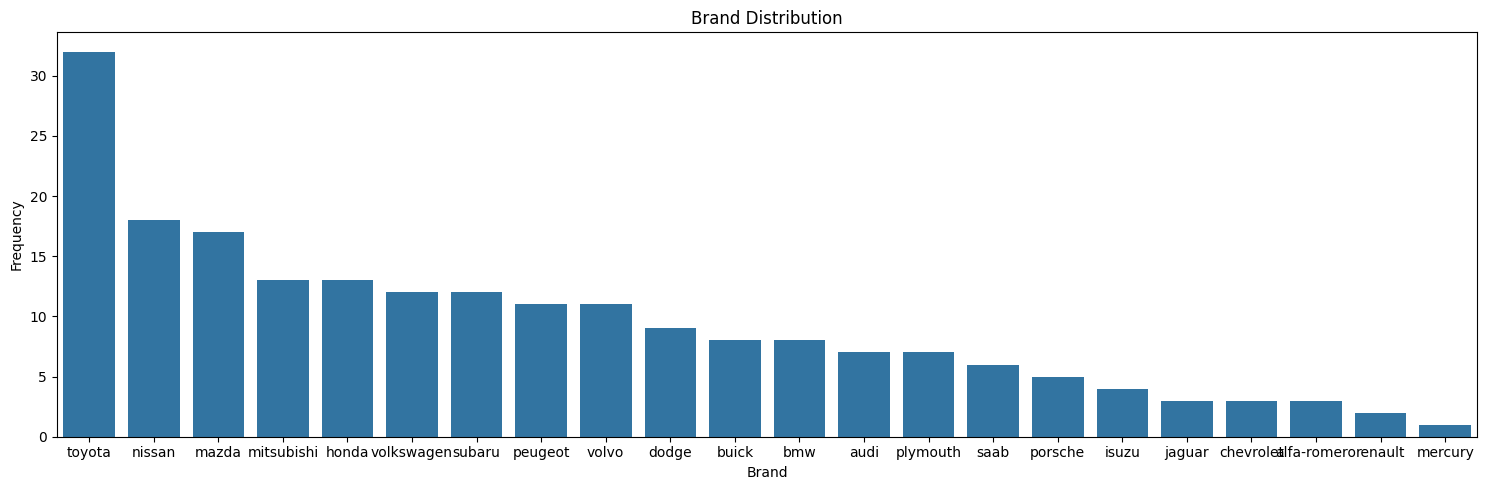

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['brand'], order=pd.value_counts(df.brand).index)
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [39]:
df = df.drop(['car_ID','symboling','CarName'], axis=1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [40]:
data_comp_avg_price = df[['brand','price']].groupby('brand', as_index=False).mean().rename(columns={'price':'avg_price'})
data_comp_avg_price

,brand,avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [41]:
df = df.merge(data_comp_avg_price, on='brand')
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,avg_price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818


In [42]:
df.avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: avg_price, dtype: float64

In [43]:
df['brand_category'] = df['avg_price'].apply(lambda x: "Budget" if x < 10000
                                             else ("Midrange" if 10000 <= x < 20000
                                                   else "Luxury"))

In [45]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,avg_price,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Midrange
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Midrange
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Midrange
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Midrange
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Midrange


## Exploratory Data Analysis

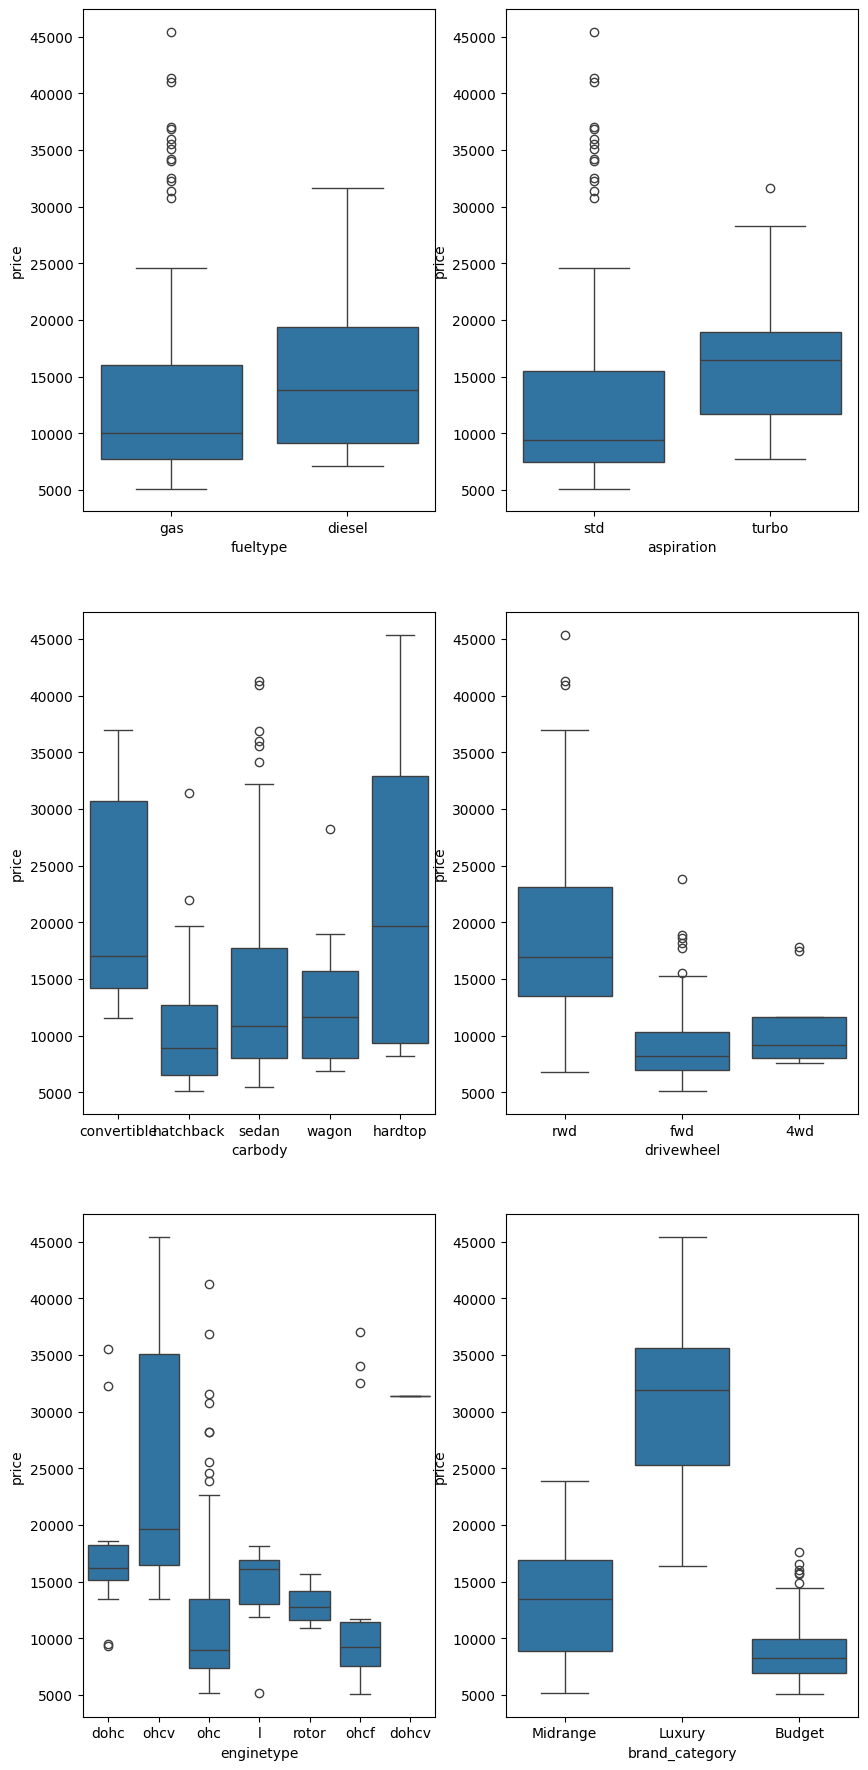

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(10,30))
plt.subplot(4,2,1)
sns.boxplot(data=df, x='fueltype', y='price')
plt.subplot(4,2,2)
sns.boxplot(data=df, x='aspiration', y='price')
plt.subplot(4,2,3)
sns.boxplot(data=df, x='carbody', y='price')
plt.subplot(4,2,4)
sns.boxplot(data=df, x='drivewheel', y='price')
plt.subplot(4,2,5)
sns.boxplot(data=df, x='enginetype', y='price')
plt.subplot(4,2,6)
sns.boxplot(data=df, x='brand_category', y='price')
plt.show()
plt.tight_layout()

In [55]:
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
avg_price           0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

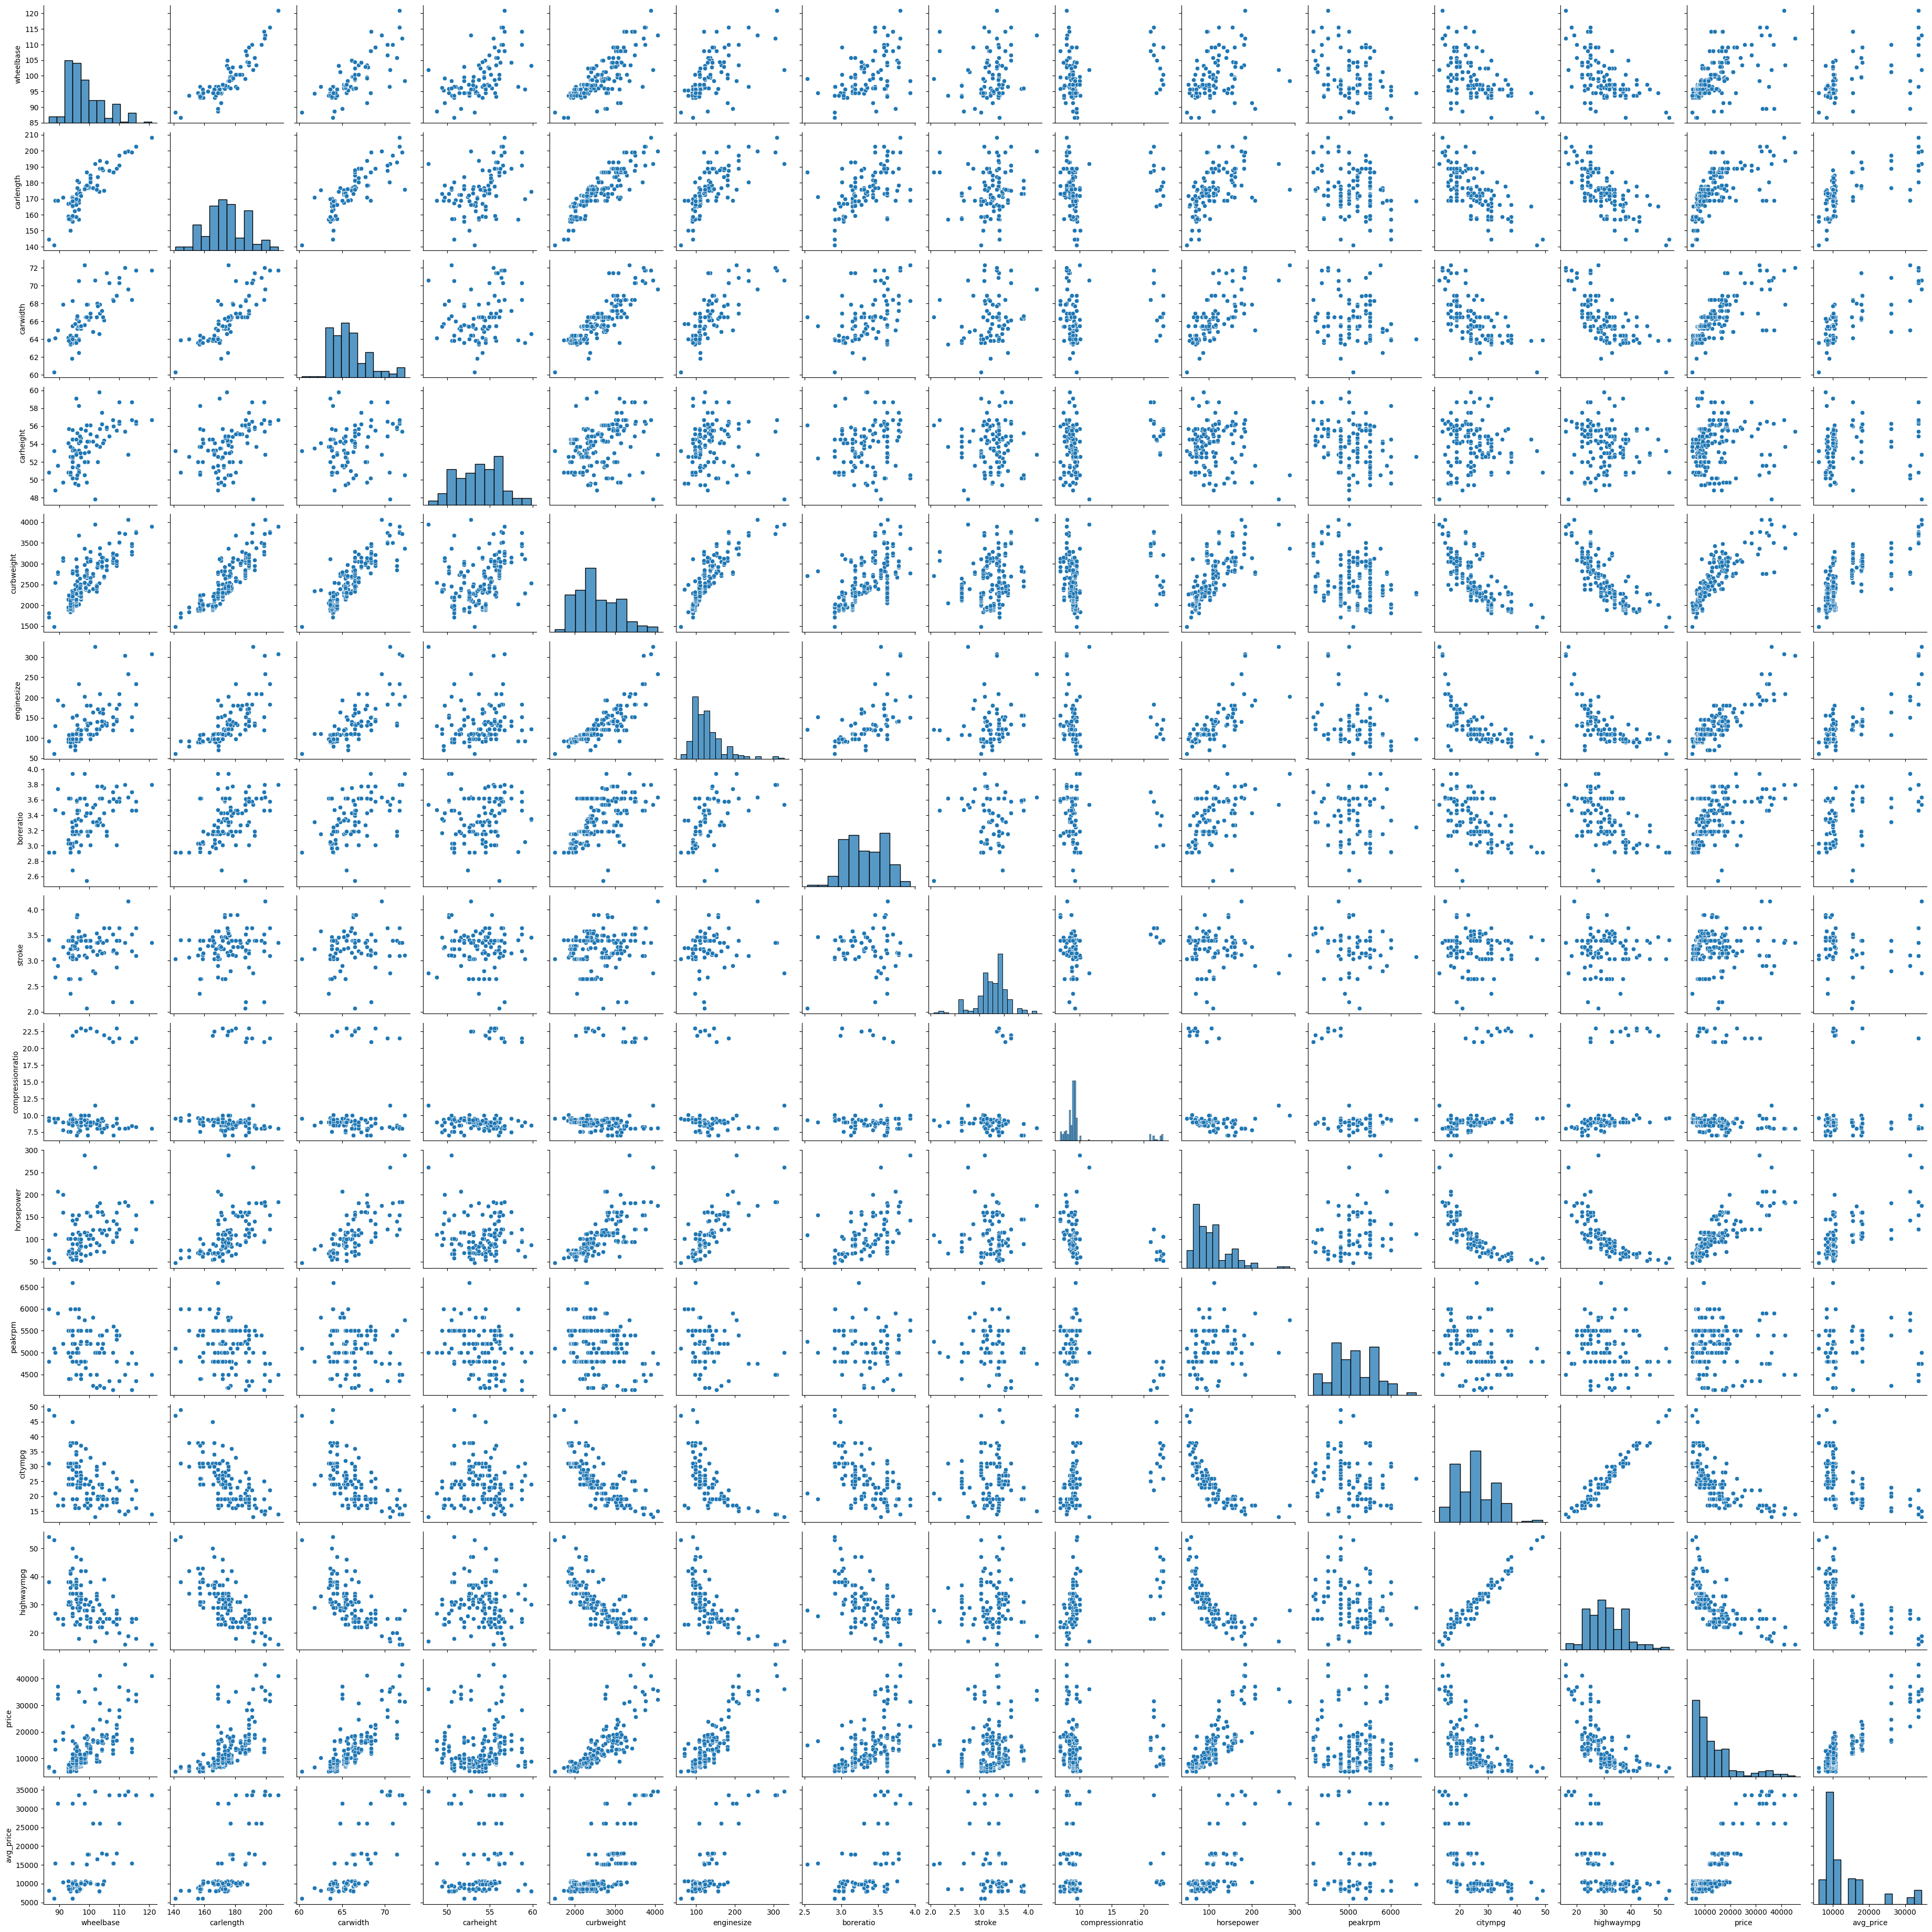

In [56]:
sns.pairplot(data=df)
plt.show()

## Testing Assumptions for Linear Regression
### 1. Linearity Assumption

Choose the features that have high correlation (above 0.5)

<Axes: xlabel='horsepower', ylabel='price'>

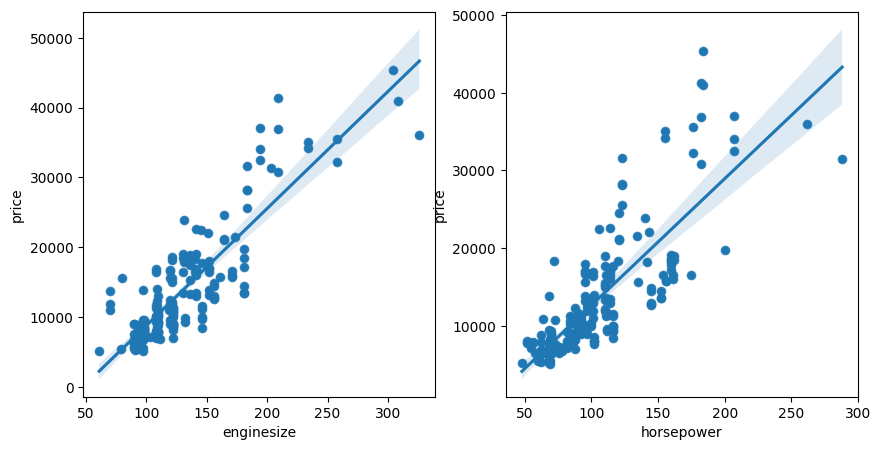

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

sns.scatterplot(data=df, x='enginesize', y='price', ax=ax1)
sns.regplot(x=df.enginesize, y=df.price, ax=ax1)

sns.scatterplot(data=df, x='horsepower', y='price', ax=ax2)
sns.regplot(x=df.horsepower, y=df.price, ax=ax2)

carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio

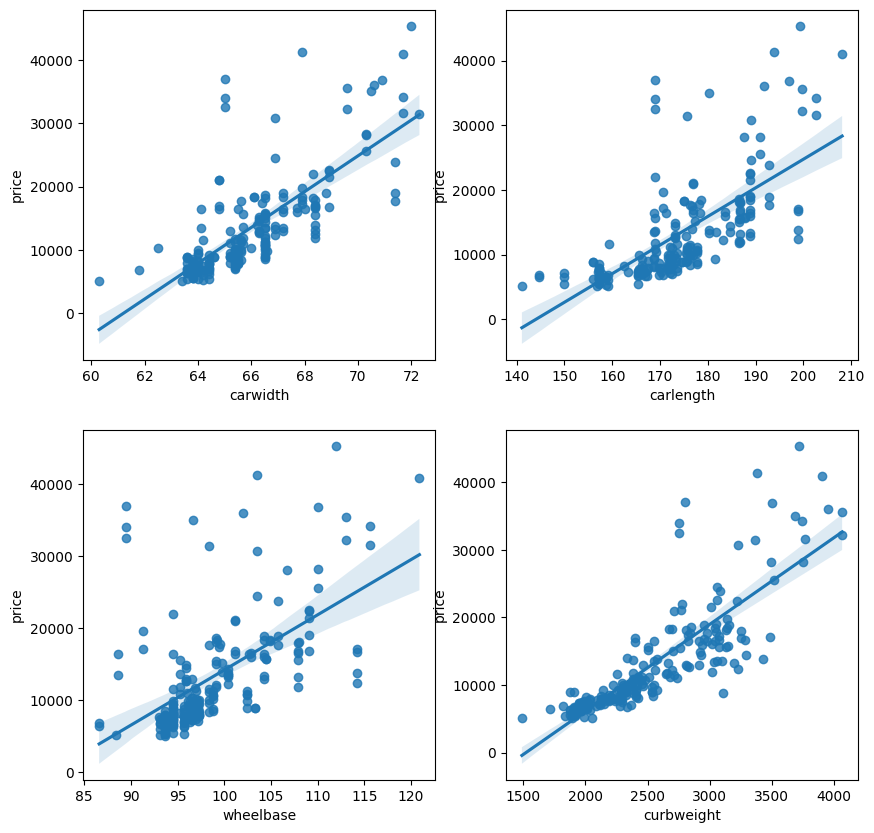

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.regplot(x=df.carwidth, y=df.price)
plt.subplot(2,2,2)
sns.regplot(x=df.carlength, y=df.price)
plt.subplot(2,2,3)
sns.regplot(x=df.wheelbase, y=df.price)
plt.subplot(2,2,4)
sns.regplot(x=df.curbweight, y=df.price)
plt.show()
plt.tight_layout()

### 2. Homoscedasticity

The assumption of *homoscedasticity* (constant variance), is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it heteroscedasticity, opposite of homoscedasticity.

<Axes: xlabel='enginesize', ylabel='price'>

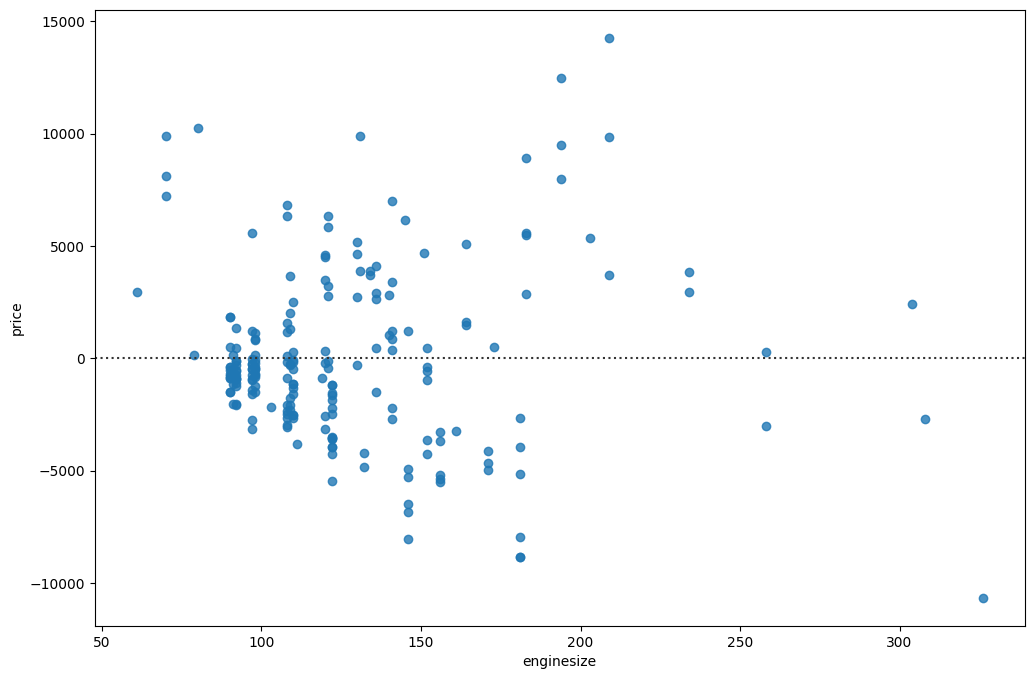

In [69]:
plt.figure(figsize=(12,8))
sns.residplot(x=df.enginesize, y=df.price)

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the *homoscedasticity* is more likely not met.


### 3. Normality

The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) contains more information on the normality assumption.

Let's display all three charts to show how our target variable, 'price' behaves.


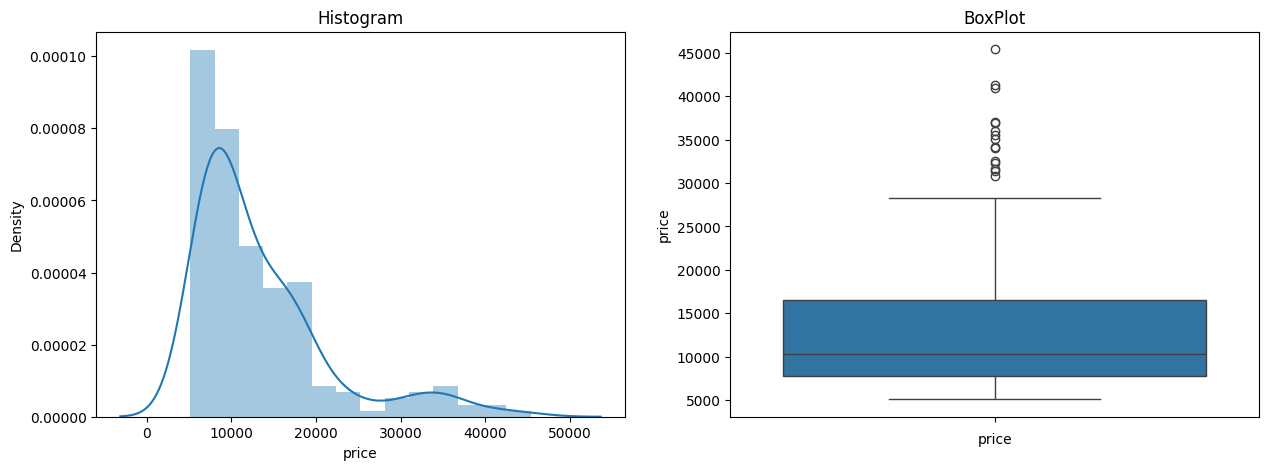

In [74]:
def plot_hist(data, feature):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.distplot(data.loc[:,feature], norm_hist=True, ax=ax1)
    sns.boxplot(data.loc[:, feature], ax=ax2)
    ax1.set(title='Histogram', xlabel='price')
    ax2.set(title='BoxPlot', xlabel='price')
plot_hist(df, 'price')

These three charts above can tell us a lot about our target variable:

*   Our target variable, 'price' is not normally distributed
*   Our target variable is right-skewed
*   There are some outliers in the variable

The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met.

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed.

But first, we will save our data that we have changed so far, in the 'previous_data' frame.

In [75]:
previous_data = df.copy()

### Log Transformation

In [77]:
normaltest(df.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

<Axes: xlabel='price', ylabel='Density'>

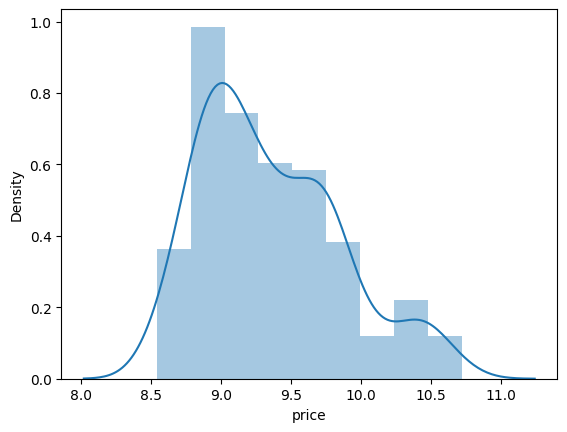

In [78]:
df['price'] = np.log(df['price'])
sns.distplot(df.price)

In [79]:
normaltest(df['price'])

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

Conclusion: Much more symmetrically distributed, but not perfectly normally distributed

In [80]:
df['price'] = previous_data.price

<Axes: ylabel='Density'>

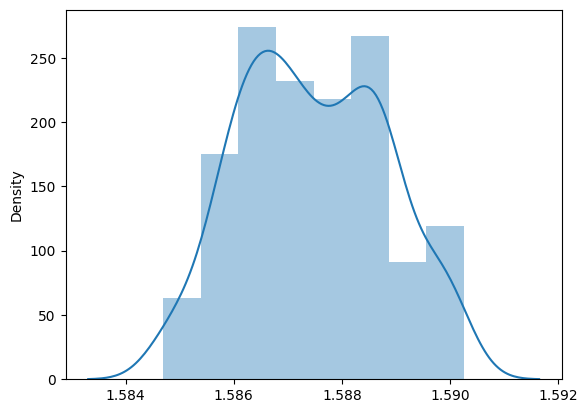

In [81]:
bc_price, lam = boxcox(df['price'])
sns.distplot(bc_price)

In [82]:
normaltest(bc_price)

NormaltestResult(statistic=16.727142394114917, pvalue=0.00023321000599424685)

### 4. Multicollinearity

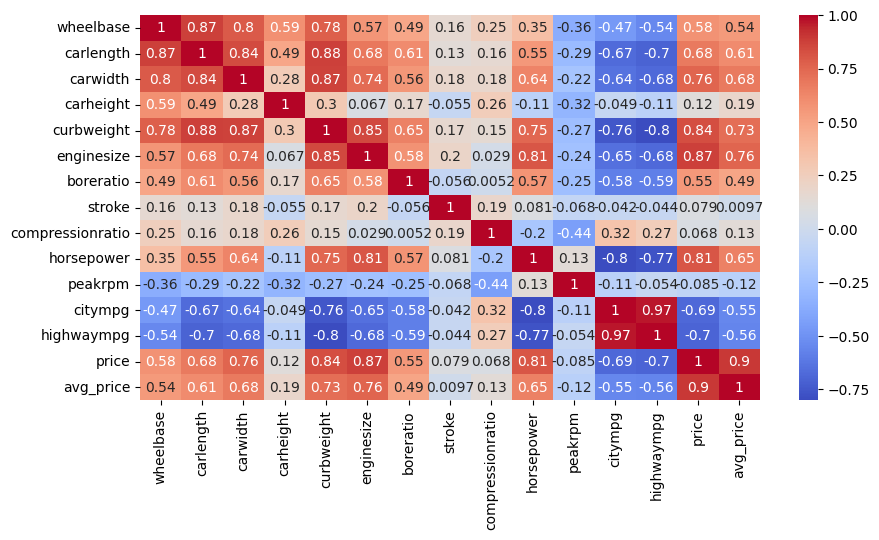

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Linear Regression Model

In [86]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']

selected = df[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


In [89]:
categorical_columns = list(selected.select_dtypes(include='object'))
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [91]:
numeric_columns = list(selected.select_dtypes(include=['int64','float64']))
numeric_columns

['price',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

Split the data into X and y

In [92]:
X = selected.drop('price', axis=1)
X

,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Midrange,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Midrange,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Midrange,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Midrange,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Midrange,2824,ohc,five,136,3.19,115,176.6,66.4,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,Midrange,2952,ohc,four,141,3.78,114,188.8,68.9,23,28
201,gas,turbo,sedan,rwd,109.1,Midrange,3049,ohc,four,141,3.78,160,188.8,68.8,19,25
202,gas,std,sedan,rwd,109.1,Midrange,3012,ohcv,six,173,3.58,134,188.8,68.9,18,23
203,diesel,turbo,sedan,rwd,109.1,Midrange,3217,ohc,six,145,3.01,106,188.8,68.9,26,27


In [93]:
y = selected.price
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [95]:
for column in categorical_columns:
    print("Column name: ",column)
    print("value count: ")
    print(X[column].value_counts(),"\n")

Column name:  fueltype
value count: 
fueltype
gas       185
diesel     20
Name: count, dtype: int64 

Column name:  aspiration
value count: 
aspiration
std      168
turbo     37
Name: count, dtype: int64 

Column name:  carbody
value count: 
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 

Column name:  drivewheel
value count: 
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 

Column name:  brand_category
value count: 
brand_category
Budget      95
Midrange    86
Luxury      24
Name: count, dtype: int64 

Column name:  enginetype
value count: 
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64 

Column name:  cylindernumber
value count: 
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64 



### One-Hot Encoder

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [98]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns)], remainder="passthrough")
X = one_hot.fit_transform(X)
type(X)

numpy.ndarray

In [99]:
names = one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Midrange', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remaind

In [102]:
column_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
column_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Midrange',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [103]:
data = pd.DataFrame(data=X, columns=column_names)
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0


## Train Test Split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3, random_state=0)

### Standardize the features by StandardScaler

In [105]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [111]:
X_train

array([[-0.36731544,  0.36731544,  0.5043669 , ..., -1.64450539,
         0.33077183,  0.40211672],
       [-0.36731544,  0.36731544,  0.5043669 , ...,  0.30020638,
         0.16363271,  0.24500554],
       [-0.36731544,  0.36731544,  0.5043669 , ..., -0.08873597,
        -1.34061941, -1.16899505],
       ...,
       [-0.36731544,  0.36731544, -1.98268366, ...,  1.17532668,
        -1.17348029, -1.01188387],
       [-0.36731544,  0.36731544,  0.5043669 , ...,  1.807358  ,
        -1.67489766, -1.79743975],
       [-0.36731544,  0.36731544,  0.5043669 , ..., -0.13735377,
        -0.17064554, -0.06921681]])

### Linear Regression

In [107]:
linearReg = LinearRegression()

In [108]:
linearReg.fit(X_train, y_train)

LinearRegression()

### Prediction

In [110]:
X_test = scaler.transform(X_test)
car_price_predictions = linearReg.predict(X_test)
car_price_predictions

array([-33801.09575449, -40244.88895657, -39542.87295049, -44895.50160456,
       -34236.65099512, -40416.36455665, -36816.26272762, -43867.27892827,
       -48720.11391022, -36202.98340877, -10701.5513957 ,  37369.01923628,
       -27832.52309805, -30844.54854622, -36607.41244101, -41614.51346856,
       -43423.696208  , -40821.42185413, -38621.160757  , -37824.64291612,
       -39430.15186106, -43580.23384172, -41856.6087436 , -41613.23600297,
       -38491.11435151, -32476.11082041, -38279.10607771, -45930.82263627,
       -39293.9073416 , -34253.49980167, -34247.89763814, -36431.06966248,
       -21540.89260867, -38971.20381434, -34253.11577827, -13449.25943376,
        -9734.1704352 , -44337.87459123, -36938.8082827 ,  24612.51485944,
       -36607.68674344, -43946.88732385,  28194.70808087, -27770.1224292 ,
       -36023.91679728, -36027.65267941, -35951.90032633, -43938.0643543 ,
       -38620.89161157, -34247.38038213, -38283.19789105, -28862.30382256,
       -36343.86455613, -

### Model Evaluation

In [112]:
from sklearn.metrics import mean_squared_error

In [114]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

2304229874.553751

In [115]:
linearReg.score(X_test, y_test)

-33.89281686215186

In [116]:
r2_score(y_test, car_price_predictions)

-33.89281686215186

This means that the data is overfitted, against the training data

## Pipeline

In [117]:
from sklearn.pipeline import Pipeline

In [120]:
steps = [('scaler', StandardScaler()), ('linearReg', LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearReg', LinearRegression())])

In [121]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse

48002.39446687791

In [122]:
r2_score(car_price_predictions, y_test)

-7.857432120996304